# Open csvs

In [2]:
import pandas as pd

cc_info = pd.read_csv("../datasets/CreditCard-Fraud-Detection-csvs/cc_info.csv")
transactions = pd.read_csv("../datasets/CreditCard-Fraud-Detection-csvs/transactions.csv")

In [3]:
cc_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   credit_card        984 non-null    int64 
 1   city               984 non-null    object
 2   state              984 non-null    object
 3   zipcode            984 non-null    int64 
 4   credit_card_limit  984 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 38.6+ KB


In [4]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294588 entries, 0 to 294587
Data columns (total 5 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   credit_card                294588 non-null  int64  
 1   date                       294588 non-null  object 
 2   transaction_dollar_amount  294588 non-null  float64
 3   Long                       294588 non-null  float64
 4   Lat                        294588 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 11.2+ MB


In [5]:
cc_info.describe()

,credit_card,zipcode,credit_card_limit
count,9.840000e+02,984.000000,984.000000
mean,5.410432e+15,17895.316057,12321.138211
std,2.545234e+15,23778.651105,7398.449174
min,1.003715e+15,690.000000,2000.000000
25%,3.316062e+15,3280.000000,7000.000000
50%,5.365218e+15,5820.000000,10000.000000
75%,7.562153e+15,18101.250000,16000.000000
max,9.999757e+15,98401.000000,55000.000000


In [6]:
transactions.describe()

,credit_card,transaction_dollar_amount,Long,Lat
count,2.945880e+05,294588.000000,294588.000000,294588.000000
mean,5.424562e+15,86.008036,-76.235238,40.937669
std,2.555803e+15,124.655954,20.135015,5.391695
min,1.003715e+15,0.010000,-179.392887,-68.046553
25%,3.344214e+15,29.970000,-80.209708,40.487726
50%,5.353426e+15,58.470000,-73.199737,42.403066
75%,7.646245e+15,100.400000,-72.091933,43.180015
max,9.999757e+15,999.970000,179.917513,78.914330


In [7]:
cc_info.head()

,credit_card,city,state,zipcode,credit_card_limit
0,1280981422329509,Dallas,PA,18612,6000
1,9737219864179988,Houston,PA,15342,16000
2,4749889059323202,Auburn,MA,1501,14000
3,9591503562024072,Orlando,WV,26412,18000
4,2095640259001271,New York,NY,10001,20000


In [8]:
transactions.head()

,credit_card,date,transaction_dollar_amount,Long,Lat
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719


# Merge

In [22]:
merged_df = cc_info.merge(transactions, on='credit_card', how='inner')
print("Birleştirilmiş Veri Seti İlk 5 Satır:")
print(merged_df.head())

Birleştirilmiş Veri Seti İlk 5 Satır:
        credit_card    city state  zipcode  credit_card_limit  \
0  1280981422329509  Dallas    PA    18612               6000   
1  1280981422329509  Dallas    PA    18612               6000   
2  1280981422329509  Dallas    PA    18612               6000   
3  1280981422329509  Dallas    PA    18612               6000   
4  1280981422329509  Dallas    PA    18612               6000   

                  date  transaction_dollar_amount       Long        Lat  
0  2015-08-05 00:59:19                      11.94 -75.964527  41.353578  
1  2015-10-29 18:23:04                       5.76 -76.019703  41.311467  
2  2015-10-25 17:50:48                      25.84 -76.043031  41.291053  
3  2015-09-05 17:39:43                      68.89 -75.944299  41.327282  
4  2015-09-04 14:12:59                      27.01 -75.997259  41.352099  


In [27]:
merged_data_cleaned = merged_df.drop(['city', 'zipcode', 'Long', 'Lat'], axis=1)
print("Temizlenmiş Veri Seti İlk 5 Satır:")
print(merged_data_cleaned.head())


Temizlenmiş Veri Seti İlk 5 Satır:
        credit_card state  credit_card_limit                 date  \
0  1280981422329509    PA               6000  2015-08-05 00:59:19   
1  1280981422329509    PA               6000  2015-10-29 18:23:04   
2  1280981422329509    PA               6000  2015-10-25 17:50:48   
3  1280981422329509    PA               6000  2015-09-05 17:39:43   
4  1280981422329509    PA               6000  2015-09-04 14:12:59   

   transaction_dollar_amount  
0                      11.94  
1                       5.76  
2                      25.84  
3                      68.89  
4                      27.01  


In [23]:
merged_df.head()

,credit_card,city,state,zipcode,credit_card_limit,date,transaction_dollar_amount,Long,Lat
0,1280981422329509,Dallas,PA,18612,6000,2015-08-05 00:59:19,11.94,-75.964527,41.353578
1,1280981422329509,Dallas,PA,18612,6000,2015-10-29 18:23:04,5.76,-76.019703,41.311467
2,1280981422329509,Dallas,PA,18612,6000,2015-10-25 17:50:48,25.84,-76.043031,41.291053
3,1280981422329509,Dallas,PA,18612,6000,2015-09-05 17:39:43,68.89,-75.944299,41.327282
4,1280981422329509,Dallas,PA,18612,6000,2015-09-04 14:12:59,27.01,-75.997259,41.352099


In [11]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294588 entries, 0 to 294587
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   credit_card                294588 non-null  int64  
 1   city                       294588 non-null  object 
 2   state                      294588 non-null  object 
 3   zipcode                    294588 non-null  int64  
 4   credit_card_limit          294588 non-null  int64  
 5   date                       294588 non-null  object 
 6   transaction_dollar_amount  294588 non-null  float64
 7   Long                       294588 non-null  float64
 8   Lat                        294588 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 22.5+ MB


In [12]:
merged_df.describe()

,credit_card,zipcode,credit_card_limit,transaction_dollar_amount,Long,Lat
count,2.945880e+05,294588.000000,294588.000000,294588.000000,294588.000000,294588.000000
mean,5.424562e+15,18073.772516,15502.053716,86.008036,-76.235238,40.937669
std,2.555803e+15,23945.510551,7956.291556,124.655954,20.135015,5.391695
min,1.003715e+15,690.000000,2000.000000,0.010000,-179.392887,-68.046553
25%,3.344214e+15,3280.000000,10000.000000,29.970000,-80.209708,40.487726
50%,5.353426e+15,5820.000000,15000.000000,58.470000,-73.199737,42.403066
75%,7.646245e+15,18612.000000,20000.000000,100.400000,-72.091933,43.180015
max,9.999757e+15,98401.000000,55000.000000,999.970000,179.917513,78.914330


In [29]:
similarities = merged_data_cleaned[['credit_card_limit', 'transaction_dollar_amount']].describe()
print("Benzerlikler ve Farklılıklar:")
print(similarities)

Benzerlikler ve Farklılıklar:
       credit_card_limit  transaction_dollar_amount
count      294588.000000              294588.000000
mean        15502.053716                  86.008036
std          7956.291556                 124.655954
min          2000.000000                   0.010000
25%         10000.000000                  29.970000
50%         15000.000000                  58.470000
75%         20000.000000                 100.400000
max         55000.000000                 999.970000


In [13]:
merged_df.isnull().sum()

credit_card                  0
city                         0
state                        0
zipcode                      0
credit_card_limit            0
date                         0
transaction_dollar_amount    0
Long                         0
Lat                          0
dtype: int64

In [14]:
merged_df.head()

,credit_card,city,state,zipcode,credit_card_limit,date,transaction_dollar_amount,Long,Lat
0,1280981422329509,Dallas,PA,18612,6000,2015-08-05 00:59:19,11.94,-75.964527,41.353578
1,1280981422329509,Dallas,PA,18612,6000,2015-10-29 18:23:04,5.76,-76.019703,41.311467
2,1280981422329509,Dallas,PA,18612,6000,2015-10-25 17:50:48,25.84,-76.043031,41.291053
3,1280981422329509,Dallas,PA,18612,6000,2015-09-05 17:39:43,68.89,-75.944299,41.327282
4,1280981422329509,Dallas,PA,18612,6000,2015-09-04 14:12:59,27.01,-75.997259,41.352099


# Plot normal distribution

# Q-Q yorumlama
Q-Q (Quantile-Quantile) plotu, gözlemlenen verilerin teorik bir dağılıma (genellikle normal dağılım) ne kadar iyi uymadığını veya uyduğunu değerlendirmenizi sağlayan bir grafiktir. Eğer verileriniz normal dağılıma yakınsa, noktalar çizginin yakınında düzgün bir şekilde dağılır. Eğer verileriniz normal dağılıma uymuyorsa, noktalar düzensiz bir şekilde dağılır.

İşte Q-Q plotunu nasıl yorumlayabileceğinizi gösteren örnek bir açıklama:

1. **Çizgi Üzerinde Yayılan Noktalar:** Eğer noktalar, çizgi üzerinde düzgün bir şekilde yayılıyorsa, bu normal dağılımı gösterir ve verileriniz normal dağılıma yakın demektir.

2. **Noktaların Eğriye Uyması:** Noktaların eğriye uygun bir şekilde dağılması, verilerinizin normal dağılıma uyduğunu gösterebilir. Ancak bazı sapmalar veya uyuşmazlıklar normal dağılımı hafifçe etkileyebilir.

3. **Noktaların Eğriye Uymaması:** Eğer noktalar eğriye uyum sağlamıyorsa, verileriniz normal dağılımı kesinlikle göstermiyor demektir. Eğriye uyumsuzluk, kuyrukta veya dağılımın merkezinde meydana gelebilir.

4. **Kuyruklarda Sapmalar:** Verilerin kuyruklarında sapmalar veya eğrilikler varsa, bu normal dağılımın ötesindeki eğilimleri gösterebilir.

Unutmayın ki, veri setlerinin gerçek dünyadaki dağılımlarının tam olarak normal dağılım olması nadirdir. Bu nedenle, Q-Q plotu sadece bir gösterge olarak kullanılmalıdır ve normal dağılım olup olmadığını kesin bir şekilde belirlemek için diğer istatistiksel ve görsel yöntemleri de kullanmanız önerilir.

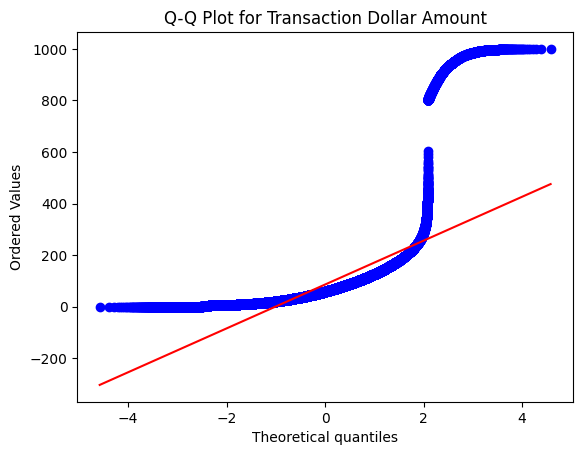

In [30]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Veri setinizin "transaction dollar amount" sütunu
data = merged_df['transaction_dollar_amount']

# Q-Q plot oluşturma
stats.probplot(data, dist="norm", plot=plt)
plt.title("Q-Q Plot for Transaction Dollar Amount")
plt.show()

# Histogram yorumlama
Histogram, veri setinizin dağılımını görsel bir şekilde gösteren bir grafiktir. Histogramın yorumlanması, veri setinizin genel yapısını anlamanıza yardımcı olabilir. İşte histogramı nasıl yorumlayabileceğinize dair birkaç ipucu:

1. **Form:** Histogram, genellikle tepe noktası ve kuyruk şekli gibi belirli bir form gösterir. Bu form, veri setinizin merkezi eğilimini ve dağılımını yansıtabilir.

2. **Merkezi Eğilim:** Histogramın en yüksek tepe noktası, verilerinizin merkezi eğilimini belirtir. Örneğin, normal dağılımı olan bir veri setinde tepe noktası ortalama değere denk gelir.

3. **Çıkıntılar (Outliers):** Histogramda genellikle en yüksek tepe noktasının yakınında, az sayıda veriyi içeren "çıkıntılar" görülebilir. Bu, aykırı değerlerin varlığını gösterebilir.

4. **Dağılım Şekli:** Histogramın genel şekli, veri setinizin dağılımını anlamak için önemlidir. Normal dağılım, orta bölümde yüksek tepe ve simetrik bir görünüm sergilerken, çarpık (skewed) dağılımlar tepe noktasını sağa veya sola itebilir.

5. **Çoklu Zirveler:** Bazı durumlarda histogramda birden fazla tepe noktası gözlenebilir. Bu, farklı veri gruplarını veya farklı davranışları yansıtabilir.

6. **Dağılım Genişliği:** Histogramın genişliği, verilerinizin yayıldığı aralığı yansıtabilir. Geniş bir dağılım, verilerin daha farklı değerlerde olduğunu gösterebilir.

7. **Normal Dağılımın Gösterimi:** Normal dağılım, tepe noktasının ortalama değere denk geldiği ve simetrik bir şekle sahip olduğu bir histogramda görülebilir.

Unutmayın ki, histogram bir özetlemedir ve verilerinizin gerçek özelliklerini anlamak için diğer istatistiksel yöntemlerle birleştirilmelidir. İyi bir yorum, verilerinizin doğasını ve anormal durumları daha iyi anlamanıza yardımcı olabilir.

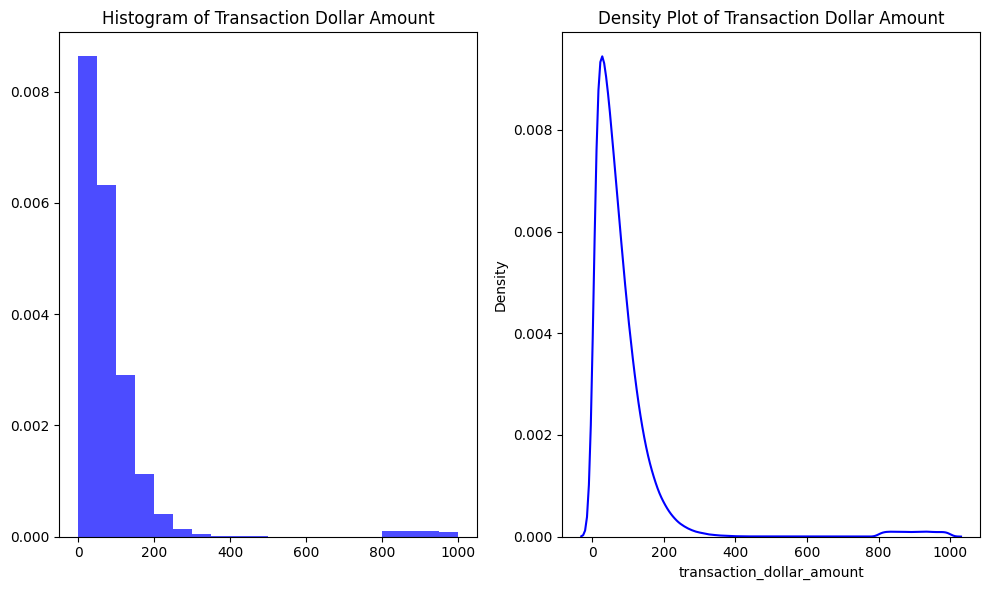

In [31]:
import seaborn as sns
plt.figure(figsize=(10, 6))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(data, bins=20, density=True, alpha=0.7, color='blue')
plt.title("Histogram of Transaction Dollar Amount")

# Yoğunluk Grafiği
plt.subplot(1, 2, 2)
sns.kdeplot(data, color='blue')
plt.title("Density Plot of Transaction Dollar Amount")

plt.tight_layout()
plt.show()

C:\Users\muham\AppData\Local\Temp\ipykernel_2680\21427474.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


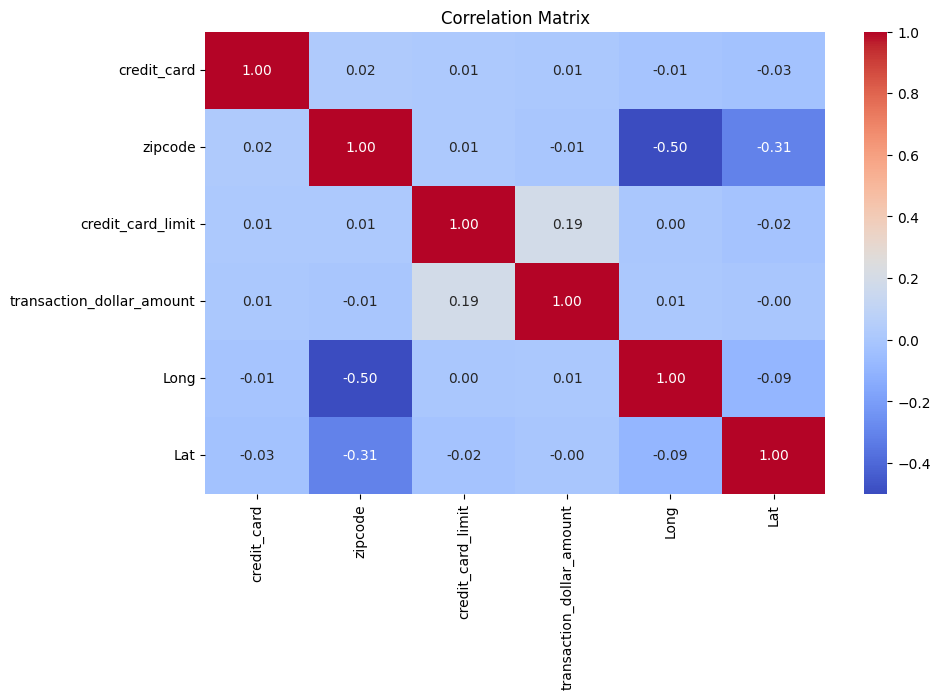

In [41]:
correlation_matrix = merged_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Outliers

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

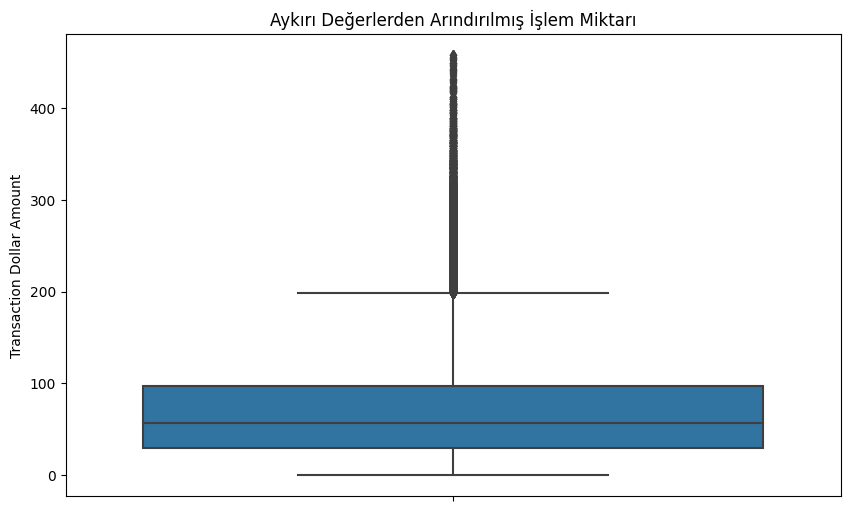

In [43]:
def detect_outliers(series, z_thresh=3):
    z_scores = (series - series.mean()) / series.std()
    return z_scores.abs() > z_thresh

outliers = detect_outliers(merged_df['transaction_dollar_amount'])

# Aykırı Değerleri Ele Alma
merged_df_cleaned = merged_df[~outliers]

# Görselleştirme
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df_cleaned, y='transaction_dollar_amount')
plt.ylabel('Transaction Dollar Amount')
plt.title('Aykırı Değerlerden Arındırılmış İşlem Miktarı')
plt.show()

In [44]:
import numpy as np
from scipy import stats

# Z-Skorları hesaplama
z_scores = np.abs(stats.zscore(merged_df['transaction_dollar_amount']))

# Aykırı değerlerin eşik değeri
z_threshold = 3

# Aykırı değerleri tespit etme
outliers = z_scores > z_threshold

# Aykırı değerlerin sayısı
outlier_count = np.sum(outliers)

print("Aykırı Değer Sayısı:", outlier_count)

Aykırı Değer Sayısı: 5493


In [45]:
len(merged_df['transaction_dollar_amount'])

294588

Fraud analizi yaparken, aykırı değerleri ele alırken dikkatli olmanız önemlidir. Aykırı değerler, fraud tespiti için hem yararlı hem de yanıltıcı olabilir. İşte aykırı değerlerle nasıl başa çıkabileceğiniz konusunda bazı stratejiler:

1. **Aykırı Değerleri İnceleyin:**
   - Aykırı değerleri dikkatlice inceleyin. Bunların gerçek anormallikleri veya sadece veri hatalarını mı yansıttığını anlamaya çalışın.

2. **Bilgiye Dönüştürme:**
   - Aykırı değerlerin fraud tespitinde önemli bilgiler taşıyabileceğini unutmayın. Örneğin, büyük miktarda alışveriş veya anormal coğrafi konumlar fraud belirtileri olabilir.

3. **Model Performansını Değerlendirin:**
   - Aykırı değerleri çıkarmadan önce ve sonra modelinizi değerlendirin. Aykırı değerler modelinizin performansını artırabilir veya azaltabilir.

4. **Özelleştirilmiş Aykırı Değer Yaklaşımı:**
   - Aykırı değerleri tespit etmek ve ele almak için özelleştirilmiş yöntemler kullanmayı düşünebilirsiniz. Bu, fraud belirtilerine özel bir yaklaşım geliştirmenizi sağlar.

5. **İki Aşamalı Model:**
   - Aykırı değerleri saptamak ve daha sonra fraud tespit modelini uygulamak üzere iki aşamalı bir yaklaşım kullanabilirsiniz.

6. **Veri Düzeltme:**
   - Aykırı değerlerin veri girişi hatalarından kaynaklanabileceğini göz önünde bulundurarak, mümkünse veri düzeltmeleri yapın.

7. **Aykırı Değerleri Dönüştürme veya Çıkarma:**
   - Aykırı değerlerin fraud analizi üzerindeki etkisini değerlendirdikten sonra, gerekiyorsa bunları düzeltebilir veya çıkarabilirsiniz.

8. **Daha Karmaşık Modeller:**
   - Aykırı değerleri ele almak için daha karmaşık yöntemler veya modeller kullanmayı düşünebilirsiniz.

Her veri seti farklıdır, bu nedenle aykırı değerleri ele alma yöntemini verilerinizin özelliklerine ve fraud analizi hedeflerinize göre özelleştirmeniz gerekebilir. Bu adımları takip ederken dikkatli olun ve fraud tespitinde ne tür bir yaklaşımın en iyi sonuçları sağlayacağını değerlendirin.

Outliers'ları çıkarmadan önce, aşağıdaki faktörleri göz önünde bulundurmanız önemlidir:

1. **Veri Dağılımı:** Aykırı değerler veri dağılımını nasıl etkiliyor? Eğer veriniz normal dağılımı bozulmuyorsa, aykırı değerleri çıkarma daha az gerekebilir.

2. **Analiz Hedefleri:** Fraud analizi için hangi özellikleri kullanıyorsunuz ve bu özelliklerin aykırı değerlerle ilişkisi nedir? Fraud tespiti için belirli özelliklerin aykırı değerleri anlam ifade edebilir.

3. **Model Performansı:** Aykırı değerleri çıkardığınızda veya işleme koyduğunuzda modelinizin performansı nasıl etkileniyor? Aykırı değerler belirli fraud durumlarını temsil ediyorsa, bu değerleri çıkarmadan veya işleme koymadan önce iyice değerlendirin.

4. **Veri Bütünlüğü:** Aykırı değerleri çıkarmak veya işleme koymak, veri setinizin bütünlüğünü nasıl etkileyecek? Diğer değişkenlerle olan ilişkileri dikkate alın.

5. **Domain Bilgisi:** Fraud tespiti alanında uzmanlığınız varsa, domain bilgisi size aykırı değerleri daha iyi değerlendirmek ve anlamak konusunda yardımcı olabilir.

6. **Alternatif Yaklaşımlar:** Aykırı değerleri çıkarmanın yanı sıra, özel bir işaretleyici olarak kullanmayı veya aykırı değerleri özel bir şekilde işlemeyi düşünebilirsiniz.

Sonuç olarak, outliers'ları çıkarıp çıkarmamanız gerektiği veri setinizin özelliklerine ve analiz hedeflerinize bağlıdır. Aykırı değerleri çıkarmadan önce veya sonra yapılacak analizlerin sonuçlarını dikkatlice değerlendirin ve bu adımları fraud analizi hedefleriniz doğrultusunda uygulayın.

# Distrubution

#### Veri dönüşümleri

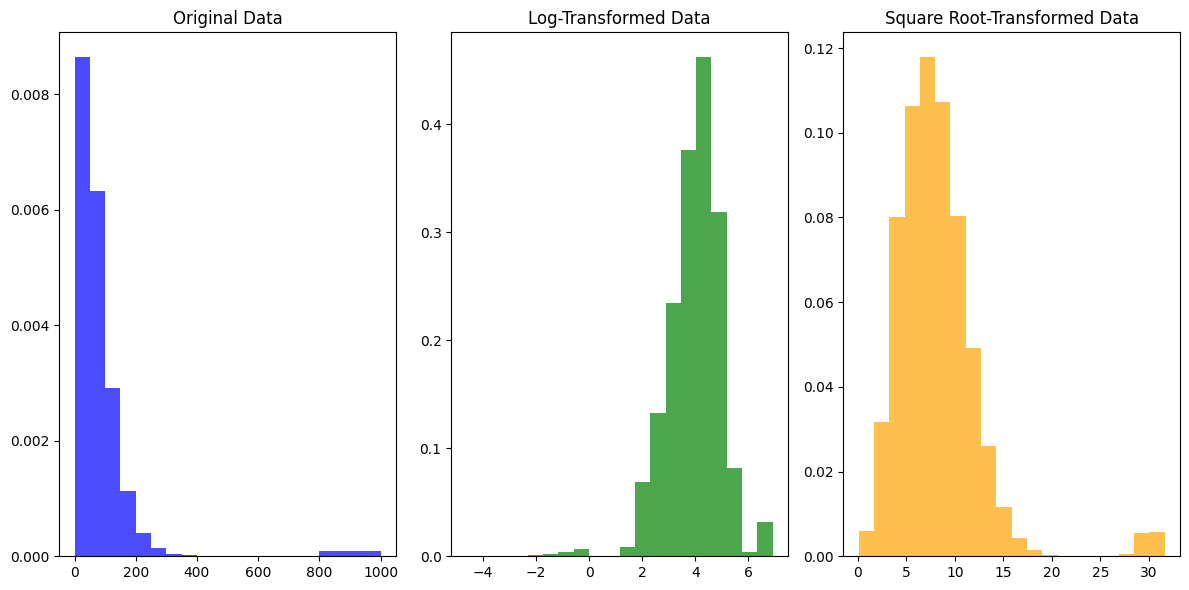

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Veri setinizin "transaction dollar amount" sütunu
data = merged_df['transaction_dollar_amount']

# Logaritmik dönüşüm
log_transformed = np.log(data)

# Karekök dönüşüm
sqrt_transformed = np.sqrt(data)

# Görselleştirme
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(data, bins=20, density=True, alpha=0.7, color='blue')
plt.title("Original Data")

plt.subplot(1, 3, 2)
plt.hist(log_transformed, bins=20, density=True, alpha=0.7, color='green')
plt.title("Log-Transformed Data")

plt.subplot(1, 3, 3)
plt.hist(sqrt_transformed, bins=20, density=True, alpha=0.7, color='orange')
plt.title("Square Root-Transformed Data")

plt.tight_layout()
plt.show()

#### Non - parametrik dönüşüm

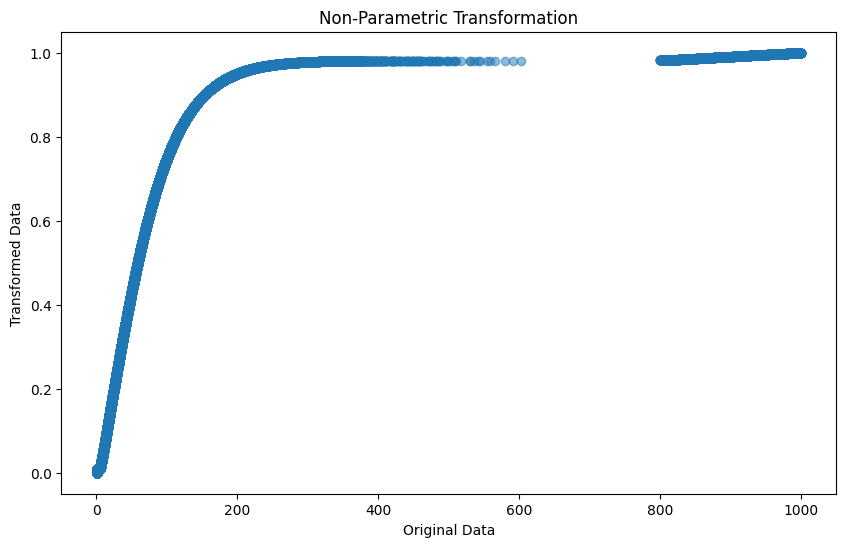

In [47]:
from scipy.stats import rankdata
from statsmodels.distributions.empirical_distribution import ECDF

# Veri setinizin "transaction dollar amount" sütunu
data = merged_df['transaction_dollar_amount']

# Ranks ve ECDF hesaplama
ranks = rankdata(data)
ecdf = ECDF(data)

# Ranks'a göre veri dönüşümü
transformed_data = ecdf(data)

# Görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(data, transformed_data, 'o', alpha=0.5)
plt.title("Non-Parametric Transformation")
plt.xlabel("Original Data")
plt.ylabel("Transformed Data")
plt.show()

##### binning

In [52]:
merged_df.describe()

,credit_card,zipcode,credit_card_limit,transaction_dollar_amount,Long,Lat
count,2.945880e+05,294588.000000,294588.000000,294588.000000,294588.000000,294588.000000
mean,5.424562e+15,18073.772516,15502.053716,86.008036,-76.235238,40.937669
std,2.555803e+15,23945.510551,7956.291556,124.655954,20.135015,5.391695
min,1.003715e+15,690.000000,2000.000000,0.010000,-179.392887,-68.046553
25%,3.344214e+15,3280.000000,10000.000000,29.970000,-80.209708,40.487726
50%,5.353426e+15,5820.000000,15000.000000,58.470000,-73.199737,42.403066
75%,7.646245e+15,18612.000000,20000.000000,100.400000,-72.091933,43.180015
max,9.999757e+15,98401.000000,55000.000000,999.970000,179.917513,78.914330


In [49]:
bin_edges = [0, 250, 500, 750, 1000]  # Bin aralıklarını istediğiniz şekilde ayarlayın

# Bin etiketleri
bin_labels = ['Low', 'Medium', 'High', 'Very High']

# Bin sütununun oluşturulması
data['binned_amount'] = pd.cut(merged_df['transaction_dollar_amount'], bins=bin_edges, labels=bin_labels, right=False)

# Sonuçları görüntüleme
print(data)

C:\Users\muham\AppData\Local\Temp\ipykernel_2680\2828157845.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['binned_amount'] = pd.cut(merged_df['transaction_dollar_amount'], bins=bin_edges, labels=bin_labels, right=False)


0                                                            11.94
1                                                             5.76
2                                                            25.84
3                                                            68.89
4                                                            27.01
                                       ...                        
294584                                                       38.07
294585                                                        56.2
294586                                                       60.44
294587                                                       58.84
binned_amount    0         Low
1         Low
2         Low
3   ...
Name: transaction_dollar_amount, Length: 294589, dtype: object


In [53]:
merged_df.head()

,credit_card,city,state,zipcode,credit_card_limit,date,transaction_dollar_amount,Long,Lat
0,1280981422329509,Dallas,PA,18612,6000,2015-08-05 00:59:19,11.94,-75.964527,41.353578
1,1280981422329509,Dallas,PA,18612,6000,2015-10-29 18:23:04,5.76,-76.019703,41.311467
2,1280981422329509,Dallas,PA,18612,6000,2015-10-25 17:50:48,25.84,-76.043031,41.291053
3,1280981422329509,Dallas,PA,18612,6000,2015-09-05 17:39:43,68.89,-75.944299,41.327282
4,1280981422329509,Dallas,PA,18612,6000,2015-09-04 14:12:59,27.01,-75.997259,41.352099


# One hot encoded

In [84]:
# Kategorik değişkenlerin bulunduğu sütunları seçin
categorical_columns = ['city', 'state']

# One-Hot Encoding uygulayın
merged_data_encode = pd.get_dummies(merged_df, columns=categorical_columns, drop_first=True)

In [85]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
merged_data_encode['city'] = label_encoder.fit_transform(merged_data_encode['city'])
merged_data_encode['state'] = label_encoder.fit_transform(merged_data_encode['state'])

KeyError: 'city'

In [86]:
merged_data_encode.head()

,credit_card,zipcode,credit_card_limit,date,transaction_dollar_amount,Long,Lat,city_Albany,city_Alexandria,city_Amarillo,...,state_OK,state_PA,state_PR,state_RI,state_TX,state_UT,state_VA,state_VT,state_WA,state_WV
0,1280981422329509,18612,6000,2015-08-05 00:59:19,11.94,-75.964527,41.353578,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1280981422329509,18612,6000,2015-10-29 18:23:04,5.76,-76.019703,41.311467,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1280981422329509,18612,6000,2015-10-25 17:50:48,25.84,-76.043031,41.291053,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1280981422329509,18612,6000,2015-09-05 17:39:43,68.89,-75.944299,41.327282,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1280981422329509,18612,6000,2015-09-04 14:12:59,27.01,-75.997259,41.352099,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [87]:
merged_data_encode["date"].head()

0    2015-08-05 00:59:19
1    2015-10-29 18:23:04
2    2015-10-25 17:50:48
3    2015-09-05 17:39:43
4    2015-09-04 14:12:59
Name: date, dtype: object

In [90]:
merged_data_encode['date'] = pd.to_datetime(merged_data_encode['date'])

In [91]:
merged_data_encode['transaction_year'] = merged_data_encode['date'].dt.year
merged_data_encode['transaction_month'] = merged_data_encode['date'].dt.month
merged_data_encode['transaction_hour'] = merged_data_encode['date'].dt.hour

In [92]:
merged_data_encode.drop(['date'], axis=1, inplace=True)

In [93]:
merged_data_encode.head()

,credit_card,zipcode,credit_card_limit,transaction_dollar_amount,Long,Lat,city_Albany,city_Alexandria,city_Amarillo,city_Arlington,...,state_RI,state_TX,state_UT,state_VA,state_VT,state_WA,state_WV,transaction_year,transaction_month,transaction_hour
0,1280981422329509,18612,6000,11.94,-75.964527,41.353578,0,0,0,0,...,0,0,0,0,0,0,0,2015,8,0
1,1280981422329509,18612,6000,5.76,-76.019703,41.311467,0,0,0,0,...,0,0,0,0,0,0,0,2015,10,18
2,1280981422329509,18612,6000,25.84,-76.043031,41.291053,0,0,0,0,...,0,0,0,0,0,0,0,2015,10,17
3,1280981422329509,18612,6000,68.89,-75.944299,41.327282,0,0,0,0,...,0,0,0,0,0,0,0,2015,9,17
4,1280981422329509,18612,6000,27.01,-75.997259,41.352099,0,0,0,0,...,0,0,0,0,0,0,0,2015,9,14


In [97]:
continuous_columns = []

for column in merged_data_encode.columns:
    if merged_data_encoded[column].dtype in ['int64', 'float64']:
        continuous_columns.append(column)

print("Sürekli Değer İçeren Sütunlar:", continuous_columns)

Sürekli Değer İçeren Sütunlar: ['credit_card', 'zipcode', 'credit_card_limit', 'transaction_dollar_amount', 'Long', 'Lat', 'transaction_year', 'transaction_month', 'transaction_hour']


In [100]:
from sklearn.ensemble import RandomForestRegressor

# Veri setinizi ve hedef değişkeni burada yükleyin
X = merged_data_encoded.drop('transaction_dollar_amount', axis=1)
y = merged_data_encoded['transaction_dollar_amount']

# Random Forest modelini oluşturun
rf_model = RandomForestRegressor()

# Modeli eğitin
rf_model.fit(X, y)

# Özellik önemlerini alın
feature_importances = rf_model.feature_importances_

# Her özelliğin önemini ve sırasını yazdırın
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

credit_card: 0.042786142211227354
zipcode: 0.001474516608837975
credit_card_limit: 0.0448808451095379
Long: 0.38039567440543803
Lat: 0.381895105128934
city_Albany: 2.262073544313972e-05
city_Alexandria: 1.1628554099887575e-05
city_Amarillo: 1.9253183273296387e-06
city_Arlington: 7.267331903556998e-05
city_Atlanta: 0.00014245061060328846
city_Auburn: 3.733591692781434e-06
city_Aurora: 3.212005917486153e-05
city_Austin: 0.00017873348241520092
city_Baltimore: 4.90294170855733e-06
city_Birmingham: 6.838379146337455e-05
city_Boise: 1.0362279492286618e-05
city_Boston: 6.930464270603735e-06
city_Bristol: 2.2173766086342362e-07
city_Bronx: 7.331432614591383e-06
city_Buffalo: 2.8630561157530235e-05
city_Cascade: 3.944171140597334e-07
city_Cedar Rapids: 9.827176771023946e-07
city_Charleston: 1.3400594404325021e-05
city_Charlotte: 4.45794745747426e-05
city_Chester: 9.122375343881631e-07
city_Chicago: 2.0895164855757215e-05
city_Cincinnati: 7.820504500595845e-05
city_Cleveland: 1.6510442048904242e

# Plot

In [ ]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


C:\Users\muham\AppData\Local\Temp\ipykernel_11672\2236112498.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


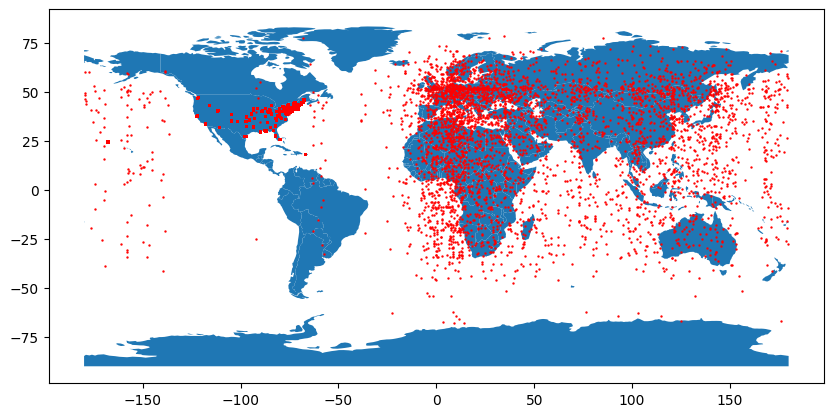

In [ ]:

geometry = [Point(xy) for xy in zip(cc_info_transactions['Long'], cc_info_transactions['Lat'])]
gdf = GeoDataFrame(cc_info_transactions, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=0.5);